# Gravitational orbits

The Lagrangian of system is:


\begin{align}
    \mathcal{L} &= T-U\\
    &=\frac{1}{2} m_1( \dot x_1^2+\dot y_1^2) + \frac{1}{2}m_2( \dot x_2^2+\dot y_2^2)+\frac{G m_1 m_2}{\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}}
\end{align}


Use the Lagrange's equation, we will find:

\begin{align*}
   \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot x_1}=\frac{\partial \mathcal{L}}{\partial x_1} \Longrightarrow
   \ddot x_1 = -\frac{G m_2 (x_1 - x_2)}{r^3}\\
   \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot x_2}=\frac{\partial \mathcal{L}}{\partial x_2} \Longrightarrow
   \ddot x_2 = \frac{G m_1 (x_1 - x_2)}{r^3}\\
   \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot x_3}=\frac{\partial \mathcal{L}}{\partial x_3} \Longrightarrow
   \ddot y_1 = -\frac{G m_2 (y_1 - y_2)}{r^3}\\
   \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot x_4}=\frac{\partial \mathcal{L}}{\partial x_4} \Longrightarrow
   \ddot y_2 = \frac{G m_1 (y_1 - y_2)}{r^3}
\end{align*}


where


$$r=((x_1-x_2)^2+(y_1-y_2)^2)^{\frac{1}{2}}$$

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [49]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 14
plt.rcParams.update({'font.size': font_size})

# Define the class

In [108]:
class GravitationalOrbits():
    """
    This class implements the parameters and Lagrange's equations for
    two particles orbiting under gravitational attraction.
    
    Parameters
    ----------
    m_1 : float
    m_2 : float
    G : float
    
    Methods
    -------
    dz_dt(t, z)
        Returns the right side of the differential equation in vector z,
        given time t and the corresponding value of z.
    """
    def __init__(self, m_1=1., m_2=1., G=1):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            A 8-component vector with 
            z[0] = x_1(t) and z[1] = x_dot_1(t)
            z[2] = y_1(t) and z[3] = y_dot_1(t)
            z[4] = x_2(t) and z[5] = x_dot_2(t)
            z[6] = y_2(t) and z[7] = y_dot_2(t)
            
        Returns
        -------
        
        """
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2 )
        return [  
                z[1], self.G * self.m_2 * (z[4] - z[0]) / r_12**3, \
                z[3], self.G * self.m_2 * (z[6] - z[2]) / r_12**3, \
                z[5], -self.G * self.m_1 * (z[4] - z[0]) / r_12**3, \
                z[7], -self.G * self.m_1 * (z[6] - z[2]) / r_12**3, \
                ]
    
    
    def solve_ode(self, t_pts, z_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method='RK23',
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
                x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
        
        
        # initialize the arrays with zeros
        num_t_pts = len(t_pts) 
        
        x_1 = np.zeros(num_t_pts)
        x_dot_1 = np.zeros(num_t_pts)
        x_dot_1_half = np.zeros(num_t_pts)
        
        y_1 = np.zeros(num_t_pts)
        y_dot_1 = np.zeros(num_t_pts)
        y_dot_1_half = np.zeros(num_t_pts)
        
        x_2 = np.zeros(num_t_pts)
        x_dot_2 = np.zeros(num_t_pts)
        x_dot_2_half = np.zeros(num_t_pts)
        
        y_2 = np.zeros(num_t_pts)
        y_dot_2 = np.zeros(num_t_pts)
        y_dot_2_half = np.zeros(num_t_pts)
        
        #initial conditions
        x_1[0] = x_1_0
        x_dot_1[0] = x_dot_1_0
        
        y_1[0] = y_1_0
        y_dot_1[0] = y_dot_1_0
        
        x_2[0] = x_2_0
        x_dot_2[0] = x_dot_2_0
        
        y_2[0] = y_2_0
        y_dot_2[0] = y_dot_2_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x_1[i], x_dot_1[i], y_1[i], y_dot_1[i], \
                 x_2[i], x_dot_2[i], y_2[i], y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1_half[i] = x_dot_1[i] + out[1] * delta_t/2.
            x_1[i+1] = x_1[i] + x_dot_1_half[i] * delta_t
            
            y_dot_1_half[i] = y_dot_1[i] + out[3] * delta_t/2.
            y_1[i+1] = y_1[i] + y_dot_1_half[i] * delta_t
            
            x_dot_2_half[i] = x_dot_2[i] + out[5] * delta_t/2.
            x_2[i+1] = x_2[i] + x_dot_2_half[i] * delta_t
            
            y_dot_2_half[i] = y_dot_2[i] + out[7] * delta_t/2.
            y_2[i+1] = y_2[i] + y_dot_2_half[i] * delta_t
            
            z = [x_1[i+1], x_dot_1[i], y_1[i+1], y_dot_1[i], \
                 x_2[i+1], x_dot_2[i], y_2[i+1], y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1[i+1] = x_dot_1_half[i] + out[1] * delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i] + out[3] * delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i] + out[5] * delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i] + out[7] * delta_t/2.
            
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog_n(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        Work for arbitrary number of points. z_0 should have
        simensin 4n: (x_0,xdot_0,y_0,ydot_0) times (1,...,n)
        while z is a 2d array with shape 4n by len(t_pts).
        (Clearly this becomes 6n if we go to three dimensions.)
        """
        delta_t = t_pts[1] - t_pts[0]
        
        #initialize the z array with zeros
        num_t_pts = len(t_pts)  # numbers of time points
        n_tot = len(z_0)        # This is 4 times the number of particles
        z = np.zeros( shape=(n_tot, num_t_pts) )
        dot_half = np.zeros( int(n_tot/2) )
        
        # initial conditions
        z[:,0] = z_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts -1):
            t = t_pts[i]
            
            z_now = z[:,i]
            out = np.asarray( self.dz_dt(t, z_now) )  # convert to a numpy array
            
            dot_half = z_now[1::2] * delta_t/2.
            z[0::2, i+1] = z_now[0::2] +dot_half * delta_t
            
            z_now[0::2] = z[0::2, i+1]
            out = np.asarray( self.dz_dt(t,z_now) )   # convert to a numpy array
            
            z[1::2, i+1] = dot_half + out[1::2] * delta_t/2.
            
        return z

In [51]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [52]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [87]:
# Labels for individual plot axes
orbit_labels = (r'$x$', r'$y$')

#Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Making plot using solve_ivp

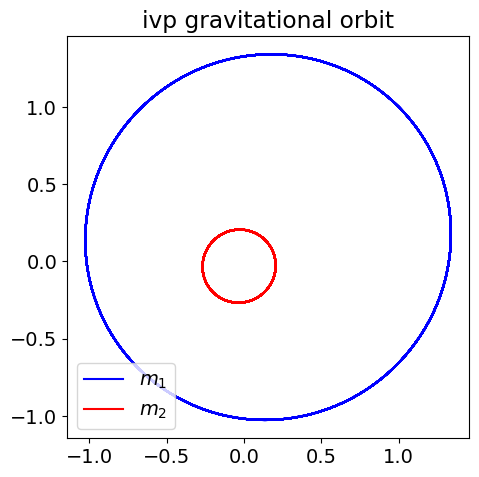

In [146]:
G = 1.
m_1 = 1.
m_2 = 5.

#Instantiate a set of orbits
o1 = GravitationalOrbits(m_1, m_2, G)

# initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
           o1.solve_ode(t_pts, z_0)

#start the plot!
fig = plt.figure(figsize=(5,5))

#first plot: orbit
ax = fig.add_subplot(1, 1, 1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('ivp gravitational orbit')
ax.legend()
ax.set_aspect(1)


fig.tight_layout()
fig.savefig('ivp_orbits.png', bbox_inches='tight')

# Heavy m_1

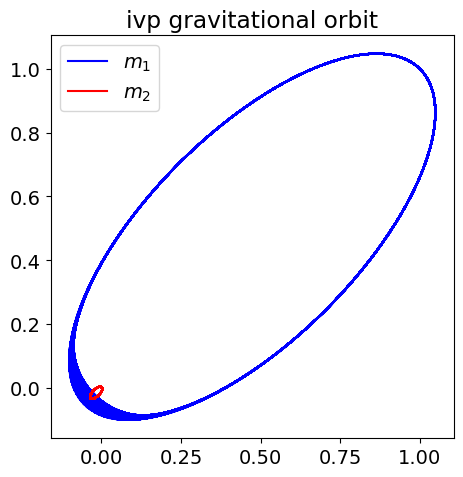

In [143]:
G = 1.
m_1 = 1.
m_2 = 30.

#Instantiate a set of orbits
o1 = GravitationalOrbits(m_1, m_2, G)

# initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
           o1.solve_ode(t_pts, z_0)

#start the plot!
fig = plt.figure(figsize=(5,5))

#first plot: orbit
ax = fig.add_subplot(1, 1, 1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('ivp gravitational orbit')
ax.legend()
ax.set_aspect(1)


fig.tight_layout()
fig.savefig('ivp_orbits.png', bbox_inches='tight')

# Heavy m_2

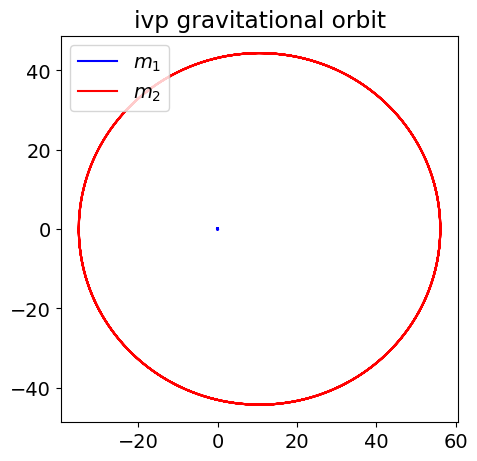

In [144]:
G = 25.
m_1 = 350
m_2 = 1

#Instantiate a set of orbits
o1 = GravitationalOrbits(m_1, m_2, G)

# initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 0.1, 0
y_1_0, y_dot_1_0 = 0, 0.05
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
           o1.solve_ode(t_pts, z_0)

#start the plot!
fig = plt.figure(figsize=(5,5))

#first plot: orbit
ax = fig.add_subplot(1, 1, 1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('ivp gravitational orbit')
ax.legend()
ax.set_aspect(1)


fig.tight_layout()
fig.savefig('ivp_orbits.png', bbox_inches='tight')

Thus, the problem reduces to the orbits considered in class if one of the bodies is heavy and I am  in its rest frame.

# Making plot using leapfrog

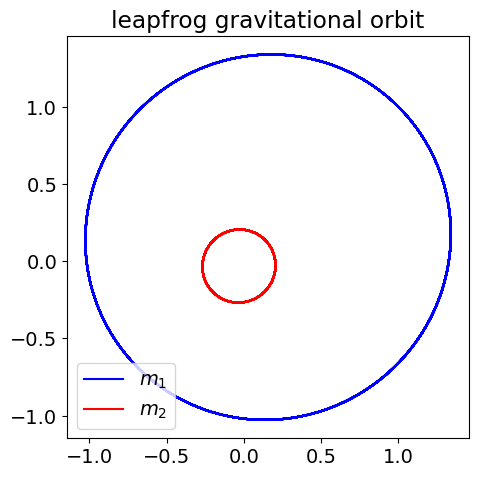

In [147]:
G = 1.
m_1 = 1.
m_2 = 5.

#Instantiate a set of orbits
o1 = GravitationalOrbits(m_1, m_2, G)

# initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
           o1.solve_ode_Leapfrog(t_pts, z_0)

#start the plot!
fig = plt.figure(figsize=(5,5))

#first plot: orbit
ax = fig.add_subplot(1, 1, 1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('leapfrog gravitational orbit')
ax.legend()
ax.set_aspect(1)


fig.tight_layout()
fig.savefig('frog.png', bbox_inches='tight')

# Animation

In [134]:
from matplotlib import animation, rc
from IPython.display import HTML

In [135]:
G = 1.
m_1 = 1.
m_2 = 5.

#Instantiate a set of orbits
o1 = GravitationalOrbits(m_1, m_2, G)

# initial conditions with com velocity zero
x_1_0, x_dot_1_0 = 1., -1.
y_1_0, y_dot_1_0 = 1., 1.
x_2_0, x_dot_2_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_dot_1_0
y_2_0, y_dot_2_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_dot_1_0

z_0 = [x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
       x_2_0, x_dot_2_0, y_2_0, y_dot_2_0]
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = \
           o1.solve_ode(t_pts, z_0)

In [139]:
%%capture
x_min = -2
x_max = -x_min
y_min = -2
y_max = -y_min

fig_anim = plt.figure(figsize=(5, 3), num='Double Orbit')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to pt1_anim and the others,
# we can later change the values.
ln1_anim, = ax_anim.plot(x_1, y_1, color='blue', lw=1)
ln2_anim, = ax_anim.plot(x_2, y_2, color='red', lw=1)

pt1_anim, = ax_anim.plot(x_1[0], y_1[0], 'o', markersize=8, color='blue')
pt2_anim, = ax_anim.plot(x_2[0], y_2[0], 'o', markersize=8, color='red')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [140]:
def animate_orbits(i):
    """
    This is the function called by FuncAnimation to create each frame,
    numbered by i. So each i corresponds to a point in the t_pts
    array, with index i.
    """
    
    i_skip = 1 * i
    
    pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip], y_2[i_skip])
    
    return (pt1_anim, pt2_anim) # this is needed for blit=True

In [141]:
frame_interval = 10. # time between frames
frame_number = 1001 # number of frames to include (index of t_pts)
anim =animation.FuncAnimation(fig_anim,
                              animate_orbits,
                              init_func=None,
                              frames=frame_number,
                              interval=frame_interval,
                              blit=True,
                              repeat=False)
HTML(anim.to_jshtml()) #animate